# **Project: Traffic-Sign-Recognition System**

## **Problem Description:**
Self-driving cars, also called as autonomous cars are becoming popular and it seems to be one of the promising ways to reduce the road accident and other damages. Autonomous cars can drive without human intervention. These systems can take accurate and safe action/reactions only if it can recognize the road signs, buildings, pedestrians and other obstacles on the roadsides. Particularly, recognition of the traffic signal on the roadside is very important component while building the autonomous cars. The leading industries like Waymo, tesla, Argo AI in manufacturing the self-driven cars have adopted AI technology and deep learning technique for the traffic sign recognition. Since, there is nonverbal communication in self-driving cars, traffic sign recognition system plays an important role in such expert system. So, there is a need to develop traffic sign recognition system.

## **Problem Statement:**
 The problem is to develop a Traffic-sign recognition system which can recognize the traffic signs put up on the road e.g. "speed limit" or "children" or "turn ahead" etc. Given the traffic signs in the image form as input, the problem is to recognize the signs using Machine learning techniques. To solve the problem following are provided:

* A huge collection of traffic signal taken under different scene is available as input. These signs may be not clearly visible, are challenging to process as they are taken from far
* Separate set of images are for testing the model is available
* Use the available data and develop a traffic sign recognition system which can categorize signs i.e, classify to which class the traffic sign belongs to.

## **Project Implementation:**
 Let first understand what traffic sign recognition is. Traffic signs are of different types like speed limits, traffic signal, turn left or right etc. Traffics recognition problem can be considered as traffic sign classification problem. Since, the traffic signs might have been captured from far, the model that we build should be able to detect accurately.

We use deep learning technique which can extract the features accurately and predict the sign class. The sign detection methods are based on the features like color, shape. To extract the features from the complex images, a deep learning technique - Convolutional Neural network and image processing techniques are used.

In [47]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam


# **Exploring the Dataset**

In [15]:
data = []
labels = []
classes = 43
# Define the dataset directory
dataset_dir = '/Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset'

# Build full paths to the CSV files
meta_path  = os.path.join(dataset_dir, 'Meta.csv')
train_path = os.path.join(dataset_dir, 'Train.csv')
test_path  = os.path.join(dataset_dir, 'Test.csv')

# Optional: Check if files exist
print("Meta.csv exists:", os.path.exists(meta_path))
print("Train.csv exists:", os.path.exists(train_path))
print("Test.csv exists:", os.path.exists(test_path))

# Read the CSV files
metaDf  = pd.read_csv(meta_path)
trainDf = pd.read_csv(train_path)
testDf  = pd.read_csv(test_path)

# Print shapes
print('Training set shape:', trainDf.shape)
print('Test set shape:', testDf.shape)
print('Meta info shape:', metaDf.shape)

Meta.csv exists: True
Train.csv exists: True
Test.csv exists: True
Training set shape: (39209, 8)
Test set shape: (12630, 8)
Meta info shape: (43, 5)


In [16]:
trainDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), trainDf['Path']))
testDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), testDf['Path']))
metaDf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), metaDf['Path']))


In [17]:
trainDf.sample(10)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
31916,127,109,11,10,116,100,30,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
23060,92,99,9,9,84,91,14,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
38908,70,70,7,6,64,63,41,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
13152,31,32,5,6,26,27,8,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
21019,56,52,6,6,51,47,13,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
35820,28,27,6,5,23,22,37,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
23986,30,30,5,5,25,25,15,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
36615,47,51,5,6,42,45,38,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
33939,34,35,6,5,28,29,34,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...
19028,39,38,6,6,34,33,12,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...


In [18]:
metaDf.sample(10)

,Path,ClassId,ShapeId,ColorId,SignId
27,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,33,1,1,4.2
13,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,2,1,0,3.29
3,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,10,1,0,3.27
24,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,30,0,0,NaN
6,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,13,4,0,2.1
16,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,22,0,0,1.1
36,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,41,1,3,3.26
15,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,21,0,0,1.3.2
14,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,20,0,0,1.1
20,/Users/vaibhavsingh/Desktop/Coding/Deep-Learni...,26,0,0,1.24


/var/folders/50/z0y6j74s1pddn8tqh8klm8x00000gn/T/ipykernel_34818/3125965319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ClassId', data=trainDf, ax=axs[0], palette="Set1")


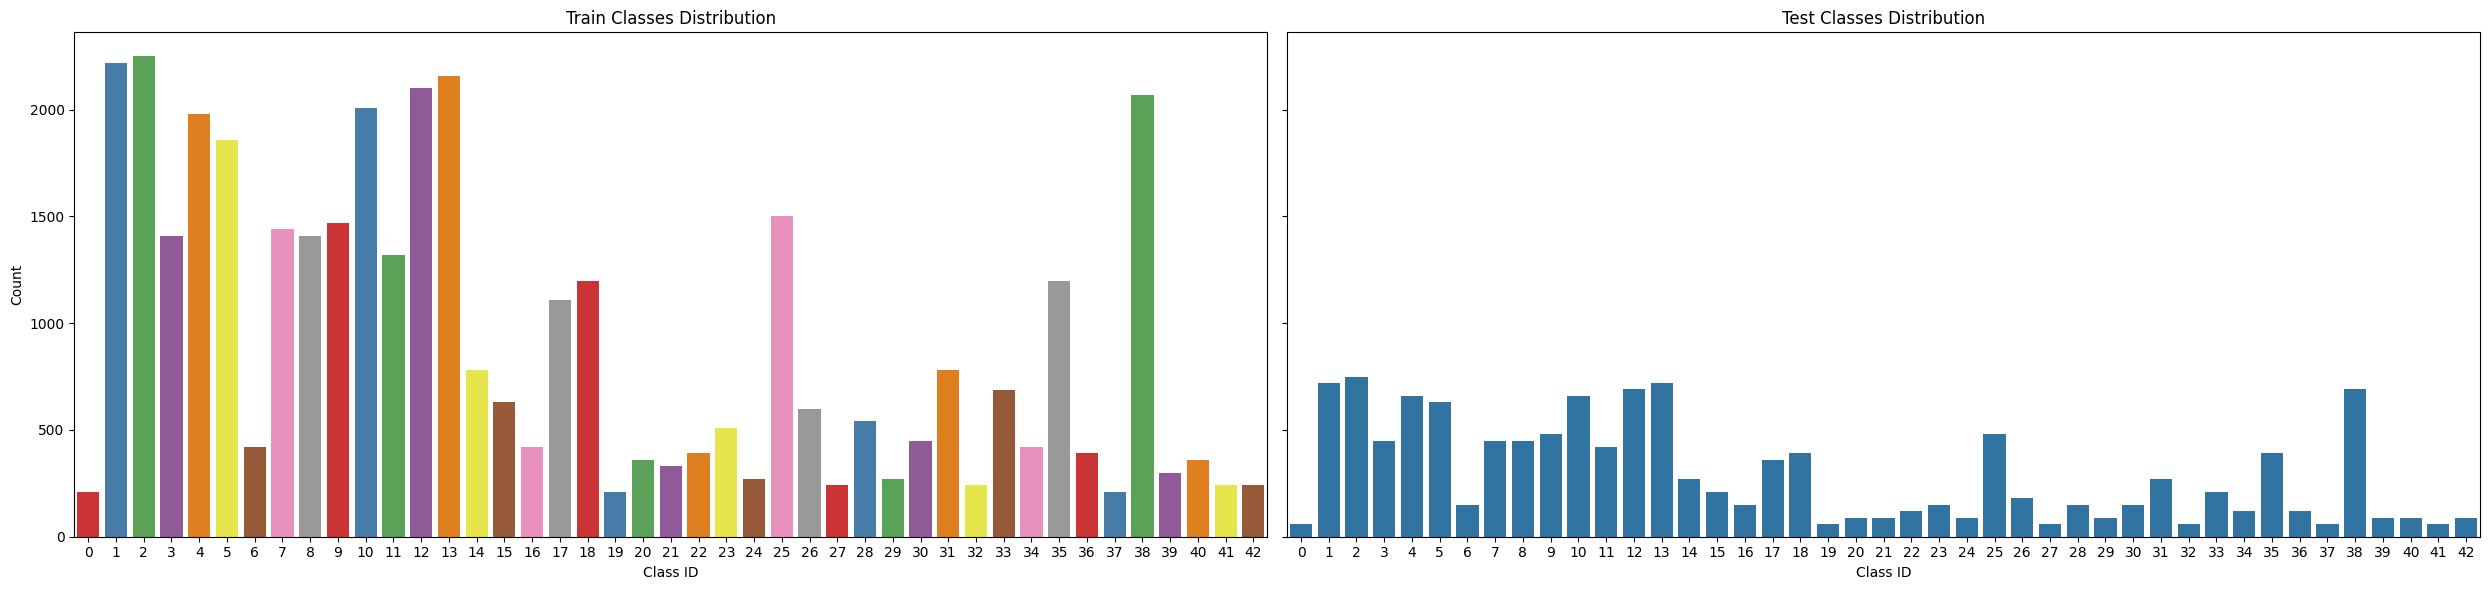

In [19]:
# Create subplots: 1 row, 2 columns, shared x and y axes
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(25, 6))

# Plot class distribution for train dataset
sns.countplot(x='ClassId', data=trainDf, ax=axs[0], palette="Set1")
axs[0].set_title('Train Classes Distribution')
axs[0].set_xlabel('Class ID')
axs[0].set_ylabel('Count')

# Plot class distribution for test dataset
sns.countplot(x='ClassId', data=testDf, ax=axs[1])
axs[1].set_title('Test Classes Distribution')
axs[1].set_xlabel('Class ID')
axs[1].set_ylabel('Count')

# Optional: Improve layout
plt.tight_layout()
plt.show()


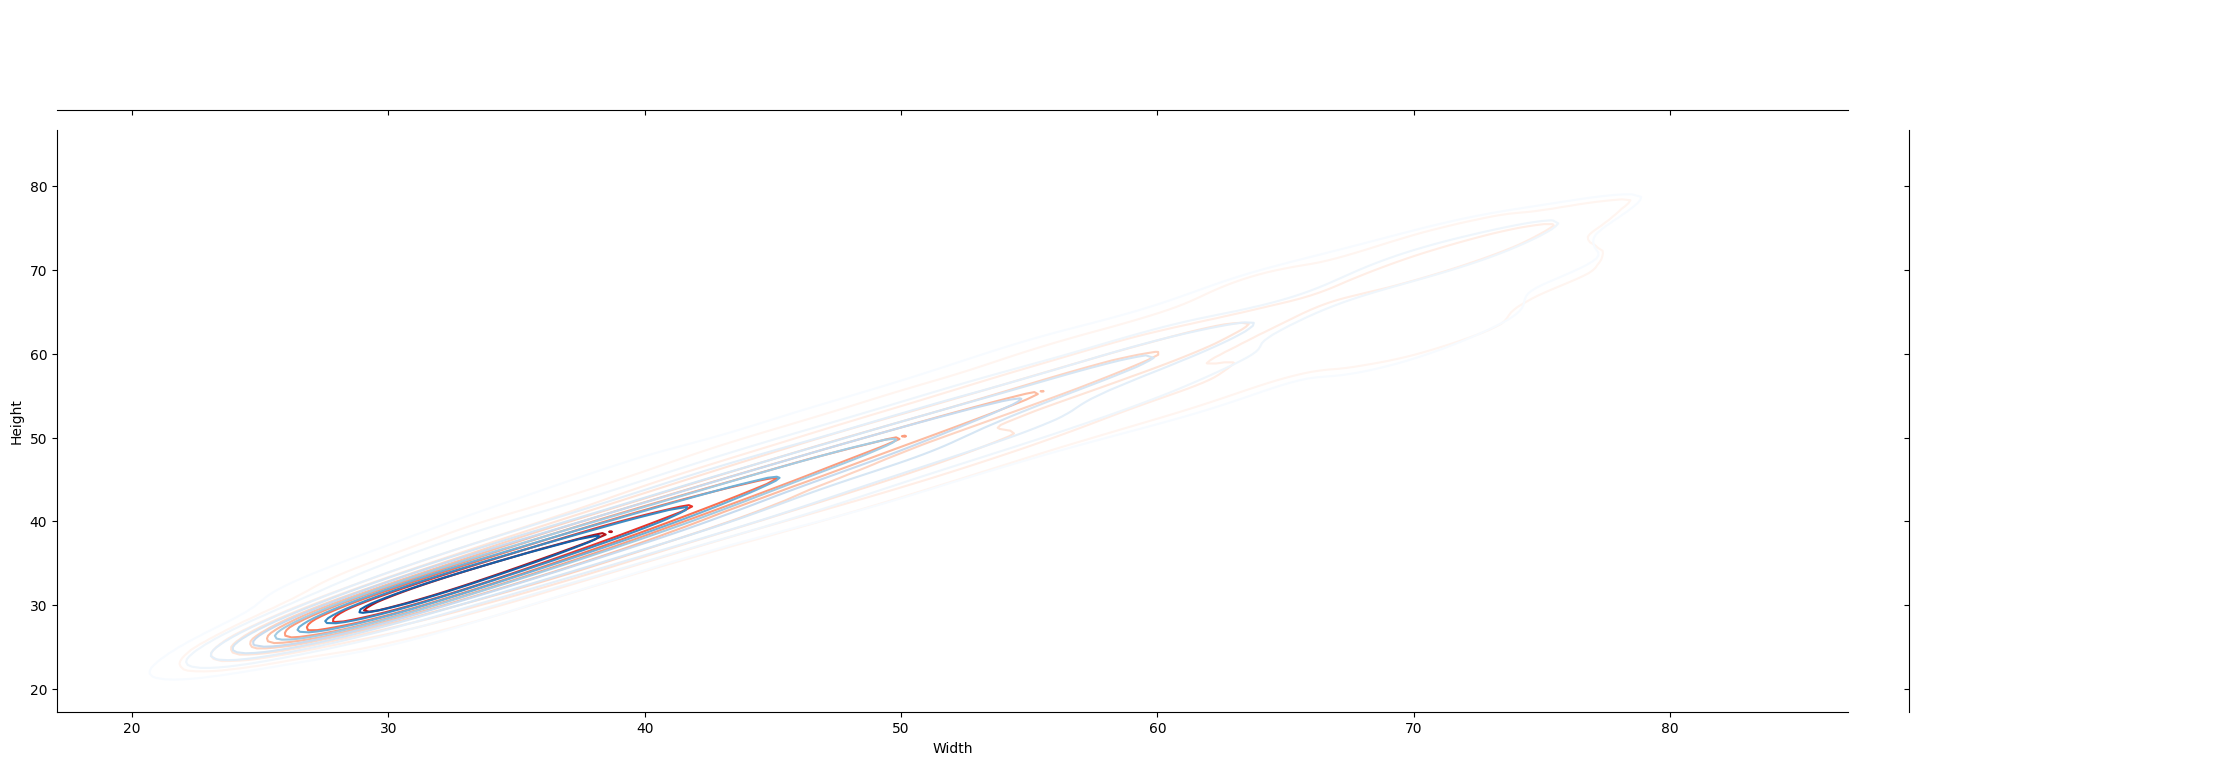

In [21]:
# Filter based on Width and Height
trainDfDpiSubset = trainDf[(trainDf.Width < 80) & (trainDf.Height < 80)]
testDfDpiSubset = testDf[(testDf.Width < 80) & (testDf.Height < 80)]

# Create JointGrid
g = sns.JointGrid(x="Width", y="Height", data=trainDfDpiSubset)

# KDE plots for train and test (overlayed)
sns.kdeplot(
    data=trainDfDpiSubset, x="Width", y="Height", ax=g.ax_joint,
    cmap="Reds", fill=False, thresh=0.05
)
sns.kdeplot(
    data=testDfDpiSubset, x="Width", y="Height", ax=g.ax_joint,
    cmap="Blues", fill=False, thresh=0.05
)

# Adjust figure size
g.fig.set_figwidth(25)
g.fig.set_figheight(8)

plt.show()


Error loading image at index 0: list index out of range
Error loading image at index 1: list index out of range
Error loading image at index 2: list index out of range
Error loading image at index 3: list index out of range
Error loading image at index 4: list index out of range
Error loading image at index 5: list index out of range
Error loading image at index 6: list index out of range
Error loading image at index 7: list index out of range
Error loading image at index 8: list index out of range
Error loading image at index 9: list index out of range
Error loading image at index 10: list index out of range
Error loading image at index 11: list index out of range
Error loading image at index 12: list index out of range
Error loading image at index 13: list index out of range
Error loading image at index 14: list index out of range
Error loading image at index 15: list index out of range
Error loading image at index 16: list index out of range
Error loading image at index 17: list ind

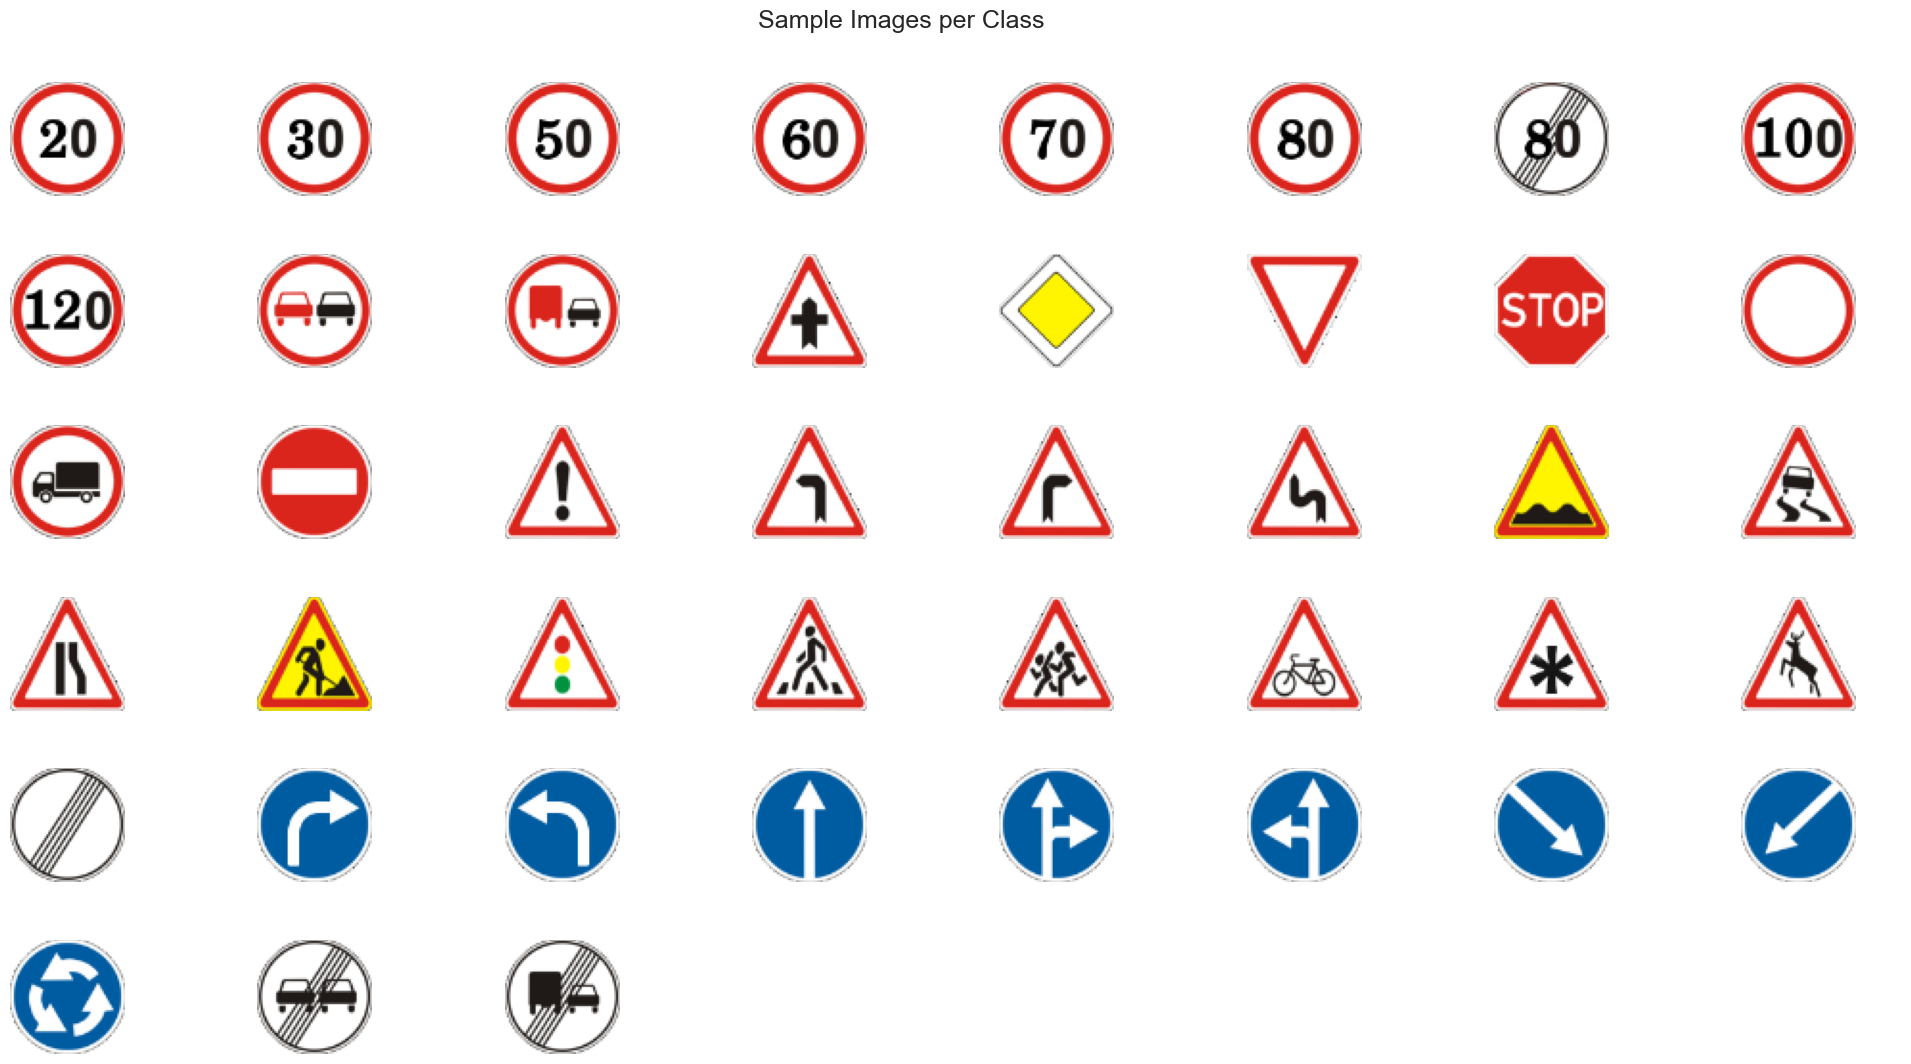

In [23]:
# Apply Seaborn style
sns.set_style("white")

# Grid settings
rows = 6
cols = 8
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(top=0.92, wspace=0.2, hspace=0.5)  # Adjust spacing

# Sort metadata
metaDf = metaDf.sort_values(by=['ClassId']).reset_index(drop=True)

# Display images
idx = 0
for i in range(rows):
    for j in range(cols):
        if idx >= len(metaDf) or idx > 42:
            axs[i, j].axis('off')  # hide any unused subplots
            continue

        try:
            img_path = metaDf.loc[idx, "Path"]
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

            # If transparent (RGBA), convert 0-alpha to white
            if img.shape[2] == 4:
                img[np.where(img[:, :, 3] == 0)] = [255, 255, 255, 255]

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (60, 60))

            axs[i, j].imshow(img)
            axs[i, j].set_facecolor((1.0, 0.47, 0.42))  # salmon
            axs[i, j].set_title(labels[int(metaDf.loc[idx, "ClassId"])], fontsize=10)
            axs[i, j].axis('off')

        except Exception as e:
            print(f"Error loading image at index {idx}: {e}")
            axs[i, j].axis('off')  # skip this image

        idx += 1

plt.suptitle("Sample Images per Class", fontsize=18)
plt.show()


Using base path: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset
[Error @ idx=0] list index out of range
[Error @ idx=1] list index out of range
[Error @ idx=2] list index out of range
[Error @ idx=3] list index out of range
[Error @ idx=4] list index out of range
[Error @ idx=5] list index out of range
[Error @ idx=6] list index out of range
[Error @ idx=7] list index out of range
[Error @ idx=8] list index out of range
[Error @ idx=9] list index out of range
[Error @ idx=10] list index out of range
[Error @ idx=11] list index out of range
[Error @ idx=12] list index out of range
[Error @ idx=13] list index out of range
[Error @ idx=14] list index out of range
[Error @ idx=15] list index out of range
[Error @ idx=16] list index out of range
[Error @ idx=17] list index out of range
[Error @ idx=18] list index out of range
[Error @ idx=19] list index out of range
[Error @ idx=20] list index out of range
[Error @ idx=21] list index out of range
[Error @ idx=22] list ind

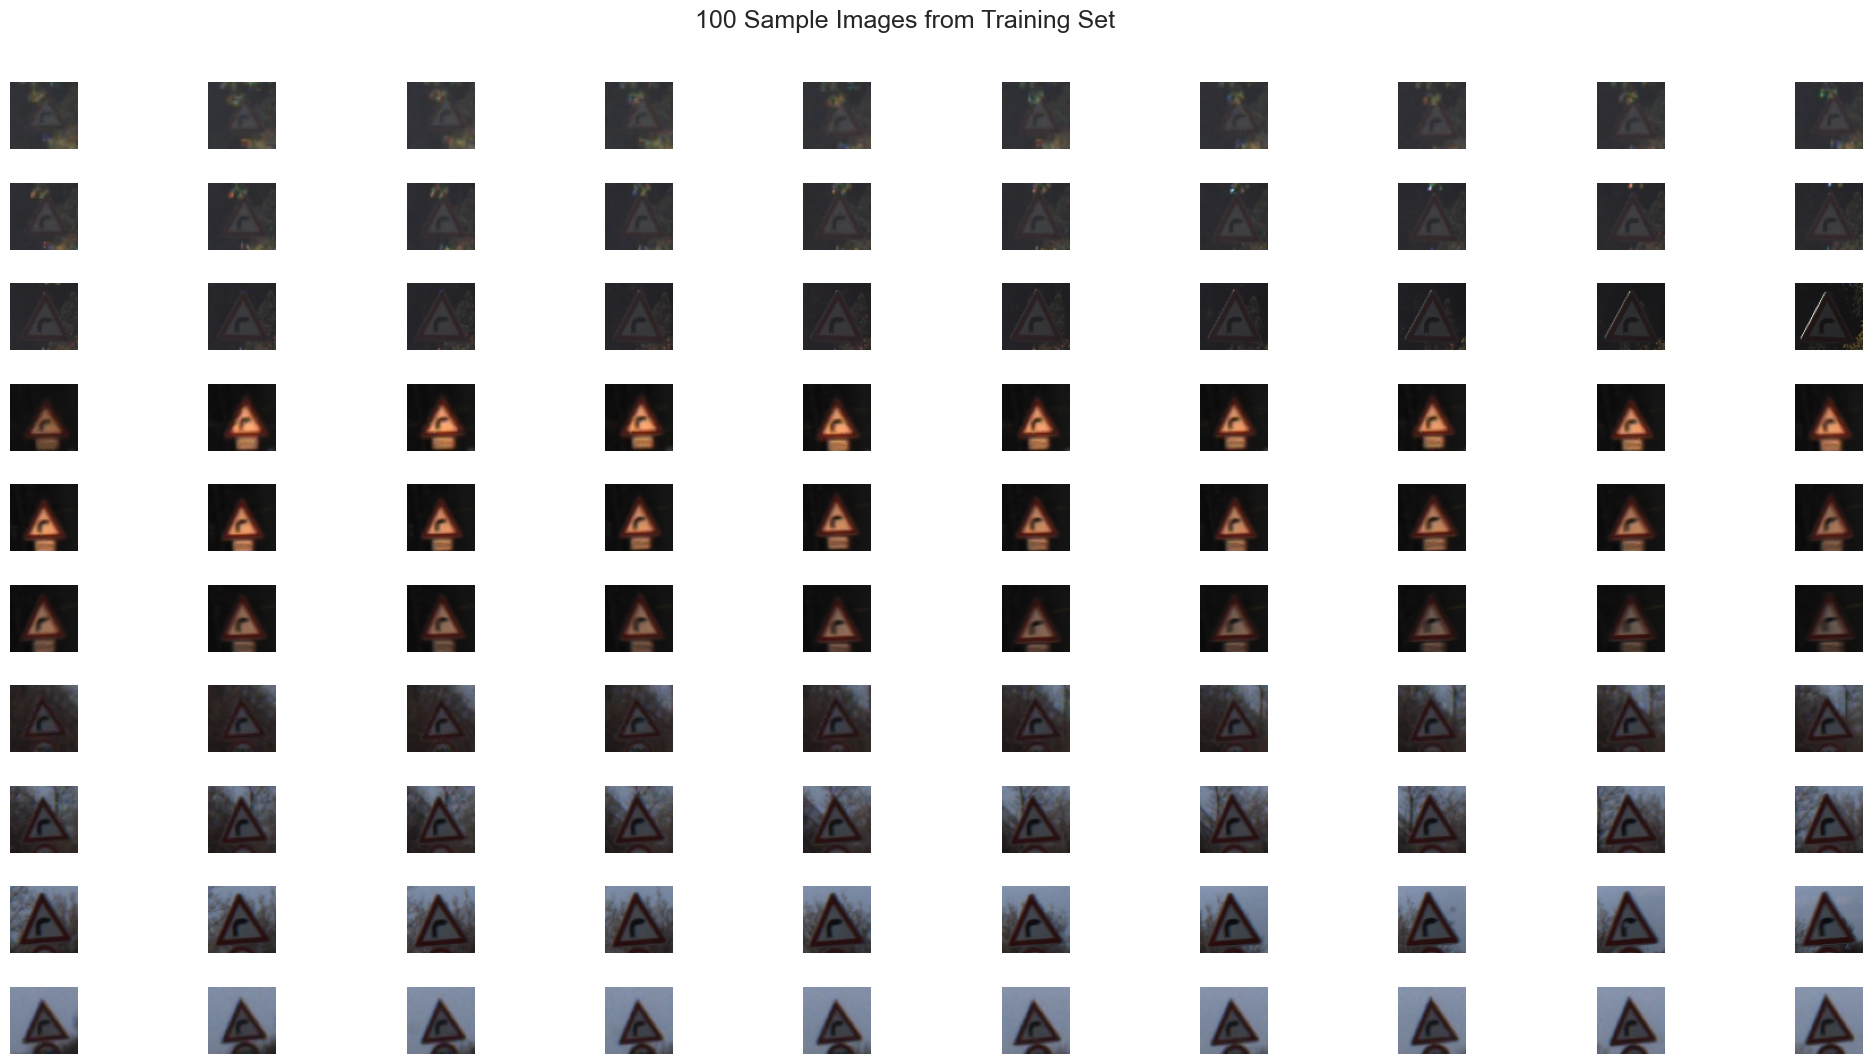

In [29]:

# Grid configuration
rows = 10
cols = 10
total = rows * cols

# Setup figure and layout
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(top=0.92, wspace=0.3, hspace=0.5)

# Set current base path
cur_path = '/Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset'
print(f"Using base path: {cur_path}")

# Limit to available data
num_images = min(total, len(trainDf))
idx = 0

for i in range(rows):
    for j in range(cols):
        ax = axs[i, j]

        if idx >= num_images:
            ax.axis('off')
            continue

        try:
            # Build full path and read image
            path = os.path.join(cur_path, trainDf.loc[idx, "Path"])
            img = cv2.imread(path, cv2.IMREAD_UNCHANGED)

            # Handle transparent images
            if img is None:
                raise ValueError(f"Image not found or unreadable at: {path}")

            if img.shape[2] == 4:  # RGBA
                img[np.where(img[:, :, 3] == 0)] = [255, 255, 255, 255]

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (60, 60))

            # Show image and title
            ax.imshow(img)
            ax.set_title(labels[int(trainDf.loc[idx, "ClassId"])], fontsize=8)
            ax.axis('off')

        except Exception as e:
            print(f"[Error @ idx={idx}] {e}")
            ax.axis('off')

        idx += 1

plt.suptitle("100 Sample Images from Training Set", fontsize=18)
plt.show()


# **Building Model**

In [32]:
data = []
labels = []
classes = 43

# Correct base directory (this is where your Dataset folder is)
base_dir = '/Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset'
train_dir = os.path.join(base_dir, 'Train')

for i in range(classes):
    path = os.path.join(train_dir, str(i))  # e.g., .../Dataset/Train/0
    print(f"Reading from: {path}")

    try:
        images = os.listdir(path)
    except Exception as e:
        print(f"Error accessing {path}: {e}")
        continue

    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print(f"Error loading image: {image_path}")


Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/0
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/1
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/2
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/3
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/4
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/5
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/6
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/7
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/8
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/9
Reading from: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/Dataset/Train/10
Reading from: /Users/vaibhavsin

In [33]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [34]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [35]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [36]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


/Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects/tf-env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.3612 - loss: 3.1810 - val_accuracy: 0.9012 - val_loss: 0.4332
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.7985 - loss: 0.6835 - val_accuracy: 0.9509 - val_loss: 0.1907
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8767 - loss: 0.4332 - val_accuracy: 0.9569 - val_loss: 0.1584
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9091 - loss: 0.3113 - val_accuracy: 0.9703 - val_loss: 0.1216
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9186 - loss: 0.2821 - val_accuracy: 0.9824 - val_loss: 0.0744
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9346 - loss: 0.2458 - val_accuracy: 0.9596 - val_loss: 0.1451
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9274 - loss: 0.2615 - val_accuracy: 0.9760 - val_loss: 0.0864
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9392 - loss: 0.2199 - 

# **Training and Validating Model**

In [39]:
X = np.array(data) / 255.0
y = np.array(labels)  

In [40]:
y = to_categorical(y, num_classes=43)

In [48]:
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN model architecture
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(43, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
#Phase 1

# Build a fresh CNN model
model = build_model()

# Train the model - Phase 1
history1 = model.fit(
    X_train, y_train,
    batch_size=50,        # Initial batch size
    epochs=10,            # Initial number of epochs
    validation_data=(X_val, y_val),
    verbose=2             # Show progress bar for each epoch
)


Epoch 1/10
628/628 - 7s - 11ms/step - accuracy: 0.4872 - loss: 1.7987 - val_accuracy: 0.8921 - val_loss: 0.4155
Epoch 2/10
628/628 - 6s - 9ms/step - accuracy: 0.8889 - loss: 0.3688 - val_accuracy: 0.9671 - val_loss: 0.1307
Epoch 3/10
628/628 - 6s - 9ms/step - accuracy: 0.9504 - loss: 0.1666 - val_accuracy: 0.9799 - val_loss: 0.0800
Epoch 4/10
628/628 - 6s - 9ms/step - accuracy: 0.9714 - loss: 0.0994 - val_accuracy: 0.9867 - val_loss: 0.0529
Epoch 5/10
628/628 - 6s - 10ms/step - accuracy: 0.9765 - loss: 0.0763 - val_accuracy: 0.9899 - val_loss: 0.0396
Epoch 6/10
628/628 - 6s - 9ms/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9846 - val_loss: 0.0572
Epoch 7/10
628/628 - 6s - 9ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9940 - val_loss: 0.0275
Epoch 8/10
628/628 - 6s - 10ms/step - accuracy: 0.9891 - loss: 0.0390 - val_accuracy: 0.9920 - val_loss: 0.0324
Epoch 9/10
628/628 - 6s - 10ms/step - accuracy: 0.9907 - loss: 0.0310 - val_accuracy: 0.9814 - val_loss: 0.06

In [50]:
#Phase2

history2 = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val),
    verbose=2
)

Epoch 1/15
491/491 - 6s - 13ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9932 - val_loss: 0.0259
Epoch 2/15
491/491 - 7s - 15ms/step - accuracy: 0.9929 - loss: 0.0225 - val_accuracy: 0.9938 - val_loss: 0.0244
Epoch 3/15
491/491 - 6s - 12ms/step - accuracy: 0.9947 - loss: 0.0173 - val_accuracy: 0.9932 - val_loss: 0.0293
Epoch 4/15
491/491 - 6s - 12ms/step - accuracy: 0.9940 - loss: 0.0202 - val_accuracy: 0.9935 - val_loss: 0.0298
Epoch 5/15
491/491 - 8s - 17ms/step - accuracy: 0.9946 - loss: 0.0174 - val_accuracy: 0.9945 - val_loss: 0.0224
Epoch 6/15
491/491 - 6s - 12ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9940 - val_loss: 0.0285
Epoch 7/15
491/491 - 6s - 12ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9960 - val_loss: 0.0232
Epoch 8/15
491/491 - 6s - 12ms/step - accuracy: 0.9962 - loss: 0.0133 - val_accuracy: 0.9935 - val_loss: 0.0277
Epoch 9/15
491/491 - 6s - 12ms/step - accuracy: 0.9943 - loss: 0.0179 - val_accuracy: 0.9932 - val_loss:

In [51]:
#Phase3

history3 = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=2
)

Epoch 1/20
246/246 - 7s - 28ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9964 - val_loss: 0.0215
Epoch 2/20
246/246 - 6s - 23ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9968 - val_loss: 0.0205
Epoch 3/20
246/246 - 6s - 23ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9968 - val_loss: 0.0192
Epoch 4/20
246/246 - 5s - 22ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9964 - val_loss: 0.0225
Epoch 5/20
246/246 - 5s - 22ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9968 - val_loss: 0.0233
Epoch 6/20
246/246 - 6s - 23ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 0.9967 - val_loss: 0.0212
Epoch 7/20
246/246 - 6s - 23ms/step - accuracy: 0.9991 - loss: 0.0032 - val_accuracy: 0.9966 - val_loss: 0.0240
Epoch 8/20
246/246 - 6s - 24ms/step - accuracy: 0.9983 - loss: 0.0049 - val_accuracy: 0.9960 - val_loss: 0.0225
Epoch 9/20
246/246 - 6s - 23ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9966 - val_loss:

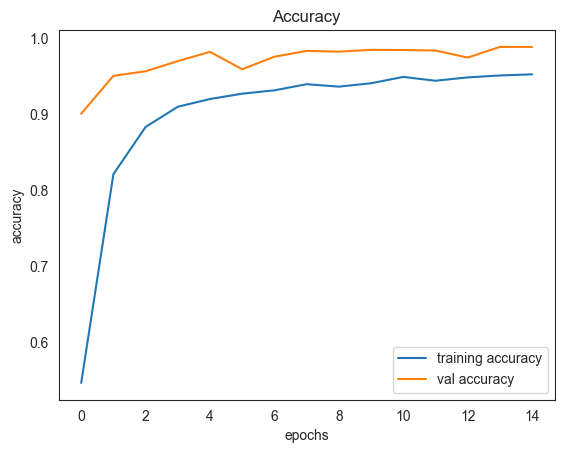

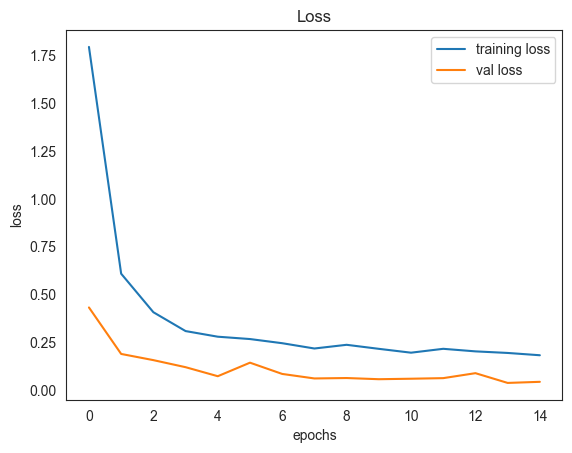

In [52]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [54]:
# Absolute path to the test image folder
path = '/Users/vaibhavsingh/Desktop/Deep-Learning Projects/Dataset/Test'

# Check current directory for reference
cur_path = os.getcwd()
print("Current Working Directory:", cur_path)

# Check and list test images
if os.path.exists(path):
    images = os.listdir(path)
    print("Test image folder found at:", path)
    print("Number of test images:", len(images))
    print("First 5 image filenames:", images[:5])
else:
    print("Test image folder does not exist at:", path)
    print(images)

Current Working Directory: /Users/vaibhavsingh/Desktop/Coding/Deep-Learning Projects
Test image folder does not exist at: /Users/vaibhavsingh/Desktop/Deep-Learning Projects/Dataset/Test
['00042_00006_00027.png', '00042_00005_00007.png', '00042_00005_00013.png', '00042_00000_00020.png', '00042_00000_00008.png', '00042_00003_00000.png', '00042_00003_00014.png', '00042_00003_00028.png', '00042_00003_00029.png', '00042_00003_00015.png', '00042_00003_00001.png', '00042_00000_00009.png', '00042_00000_00021.png', '00042_00005_00012.png', '00042_00005_00006.png', '00042_00006_00026.png', '00042_00006_00018.png', '00042_00006_00024.png', '00042_00005_00010.png', '00042_00005_00004.png', '00042_00000_00023.png', '00042_00003_00017.png', '00042_00003_00003.png', '00042_00003_00002.png', '00042_00003_00016.png', '00042_00000_00022.png', '00042_00005_00005.png', '00042_00005_00011.png', '00042_00006_00025.png', '00042_00006_00019.png', '00042_00006_00021.png', '00042_00006_00009.png', '00042_00005_

# **Predicting the Class**

In [60]:
# Path where test images are stored
test_img_dir = '/Users/vaibhavsingh/Desktop/Deep-Learning Projects/Dataset/Test'

# Load the correct test data using Test.csv
data = []
for i in range(len(testDf)):
    img_path = os.path.join(test_img_dir, testDf.iloc[i]['Path'])  # or whatever column name holds image path
    img = cv2.imread(img_path)
    img = cv2.resize(img, (30, 30))  # assuming this is your model's input shape
    data.append(img)

X_test = np.array(data)
y_test = np.array(testDf['ClassId'])

# Predict on the correct test set
pred_probs = model.predict(X_test)
pred = np.argmax(pred_probs, axis=1)

# Now compute accuracy
from sklearn.metrics import accuracy_score # type: ignore
print(f"✅ Accuracy on test set: {accuracy_score(y_test, pred):.5f}")

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
✅ Accuracy on test set: 0.60372
